<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/IRIS_experiment_fold1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [186]:
import warnings
warnings.filterwarnings("ignore")

In [187]:
# Load the iris dataset
#
iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data)

# add outcome variable
df['class'] = iris.target

In [188]:
#getting 3 folds since data set is small

"""from sklearn.model_selection import KFold

#df = in_file.values
kf = KFold(n_splits=3, shuffle=True, random_state=1)

for i, (train, test) in enumerate(kf.split(df)):

  train_d = df.iloc[train]
  test_d =  df.iloc[test]
  train_d.to_csv('/content/drive/MyDrive/Iris_Dataset/K-fold/train'+str(i)+'.csv', header=['0', '1', '2', '3','class'], index=False)
  test_d.to_csv('/content/drive/MyDrive/Iris_Dataset/K-fold/test'+str(i)+'.csv', header=['0', '1', '2', '3', 'class'], index=False)"""

In [189]:
train= pd.read_csv("/content/drive/MyDrive/Iris_Dataset/K-fold/train0.csv")

In [190]:
X = np.matrix(train.iloc[:, [0, 1, 2, 3]])
y = np.array(train['class'])

In [191]:
test= pd.read_csv("/content/drive/MyDrive/Iris_Dataset/K-fold/test0.csv")
X_test = np.matrix(test.iloc[:, [0, 1, 2, 3]])
y_test = np.array(test['class'])

In [192]:
#
# Create training and test split
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

val_labels = to_categorical(y_val)

In [193]:
# define the overfitting model

overfitting_network = models.Sequential() #512
overfitting_network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
overfitting_network.add(layers.Dense(3, activation='softmax'))

# define the underfitting model

underfitting_network = models.Sequential() #512
underfitting_network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
underfitting_network.add(layers.Dense(3, activation='softmax'))

In [194]:
# Compile the network
#
overfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

underfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [195]:
# Fit the overfitting neural network
#
history = overfitting_network.fit(X_train, train_labels, epochs=400, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/400
2/2 [==============================] - 1s 143ms/step - loss: 0.9451 - accuracy: 0.5625 - val_loss: 1.0127 - val_accuracy: 0.4500
Epoch 2/400
2/2 [==============================] - 0s 22ms/step - loss: 0.8783 - accuracy: 0.6000 - val_loss: 0.8395 - val_accuracy: 0.6000
Epoch 3/400
2/2 [==============================] - 0s 24ms/step - loss: 0.7754 - accuracy: 0.7125 - val_loss: 0.7850 - val_accuracy: 0.9000
Epoch 4/400
2/2 [==============================] - 0s 29ms/step - loss: 0.7035 - accuracy: 0.8375 - val_loss: 0.7540 - val_accuracy: 0.6000
Epoch 5/400
2/2 [==============================] - 0s 23ms/step - loss: 0.6847 - accuracy: 0.8000 - val_loss: 0.7537 - val_accuracy: 0.6000
Epoch 6/400
2/2 [==============================] - 0s 25ms/step - loss: 0.6494 - accuracy: 0.7625 - val_loss: 0.7194 - val_accuracy: 0.6000
Epoch 7/400
2/2 [==============================] - 0s 23ms/step - loss: 0.6042 - accuracy: 0.7500 - val_loss: 0.6834 - val_accuracy: 0.6000
Epoch 8/400
2/2 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


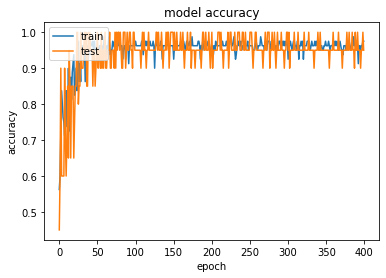

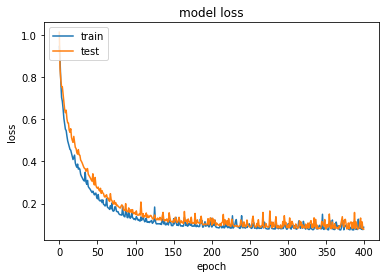

In [196]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [197]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = overfitting_network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

2/2 [==============================] - 0s 4ms/step - loss: 0.0477 - accuracy: 1.0000
Test Accuracy:  1.0 
Test Loss:  0.047682955861091614


In [198]:
y_hats_overfitting = overfitting_network.predict(test.iloc[:, [0, 1, 2, 3]])
classes_x_overfitting=np.argmax(y_hats_overfitting,axis=1)

In [199]:
overfitting_predictions = pd.DataFrame(classes_x_overfitting, columns=['overfitting_predictions'])
test = pd.concat([test, overfitting_predictions], axis =1)


In [200]:
test

,0,1,2,3,class,overfitting_predictions
0,5.0,3.6,1.4,0.2,0,0
1,5.4,3.9,1.7,0.4,0,0
2,5.8,4.0,1.2,0.2,0,0
3,5.4,3.9,1.3,0.4,0,0
4,5.1,3.5,1.4,0.3,0,0
5,5.7,3.8,1.7,0.3,0,0
6,5.1,3.8,1.5,0.3,0,0
7,5.2,3.4,1.4,0.2,0,0
8,4.7,3.2,1.6,0.2,0,0
9,5.4,3.4,1.5,0.4,0,0


In [201]:
#train underfitting
history = underfitting_network.fit(X_train, train_labels, epochs=15, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/15
2/2 [==============================] - 1s 148ms/step - loss: 1.0365 - accuracy: 0.4000 - val_loss: 0.9755 - val_accuracy: 0.5500
Epoch 2/15
2/2 [==============================] - 0s 20ms/step - loss: 0.8953 - accuracy: 0.6750 - val_loss: 0.9067 - val_accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 21ms/step - loss: 0.8701 - accuracy: 0.6000 - val_loss: 0.8556 - val_accuracy: 0.6000
Epoch 4/15
2/2 [==============================] - 0s 24ms/step - loss: 0.7710 - accuracy: 0.7125 - val_loss: 0.8110 - val_accuracy: 0.6000
Epoch 5/15
2/2 [==============================] - 0s 19ms/step - loss: 0.7075 - accuracy: 0.7125 - val_loss: 0.7677 - val_accuracy: 0.6000
Epoch 6/15
2/2 [==============================] - 0s 20ms/step - loss: 0.6783 - accuracy: 0.8000 - val_loss: 0.7576 - val_accuracy: 0.6000
Epoch 7/15
2/2 [==============================] - 0s 23ms/step - loss: 0.6420 - accuracy: 0.7125 - val_loss: 0.7064 - val_accuracy: 0.6000
Epoch 8/15
2/2 [==========

In [202]:
y_hats_underfitting = underfitting_network.predict(test.iloc[:, [0, 1, 2, 3]])
classes_x_underfitting=np.argmax(y_hats_underfitting,axis=1)

In [203]:
underfitting_predictions = pd.DataFrame(classes_x_underfitting, columns=['underfitting_predictions'])
test = pd.concat([test, underfitting_predictions], axis =1)

In [204]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = underfitting_network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

2/2 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.8200
Test Accuracy:  0.8199999928474426 
Test Loss:  0.4939020276069641


Binning the continous columns

In [205]:
train.describe()

,0,1,2,3,class
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.806000,3.033000,3.772000,1.205000,1.030000
std,0.832159,0.414888,1.762407,0.777899,0.834302
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.600000,0.200000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.700000,4.400000,6.700000,2.500000,2.000000


In [206]:
bins_0 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5]
bins_1 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5]
bins_2 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5]
bins_3 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5]
labels_0 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8]
labels_1 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8]
labels_2 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8]
labels_3 = [0, 0.5,0.75,1,1.25,1.5, 2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8]
train['binned_0'] = pd.cut(train['0'], bins_0,labels=labels_0)
train['binned_1'] = pd.cut(train['1'], bins_1,labels=labels_1)
train['binned_2'] = pd.cut(train['2'], bins_2,labels=labels_2)
train['binned_3'] = pd.cut(train['3'], bins_3,labels=labels_3)
print(train)

      0    1    2    3  class binned_0 binned_1 binned_2 binned_3
0   5.1  3.5  1.4  0.2      0      4.5      3.0     1.25      0.0
1   4.9  3.0  1.4  0.2      0      4.5      2.5     1.25      0.0
2   4.7  3.2  1.3  0.2      0      4.5      3.0     1.25      0.0
3   4.6  3.1  1.5  0.2      0      4.5      3.0     1.25      0.0
4   4.6  3.4  1.4  0.3      0      4.5      3.0     1.25      0.0
..  ...  ...  ...  ...    ...      ...      ...      ...      ...
95  6.7  3.3  5.7  2.5      2      6.5      3.0     4.50      2.0
96  6.7  3.0  5.2  2.3      2      6.5      2.5     4.50      2.0
97  6.5  3.0  5.2  2.0      2      6.0      2.5     4.50      1.5
98  6.2  3.4  5.4  2.3      2      6.0      3.0     4.50      2.0
99  5.9  3.0  5.1  1.8      2      4.5      2.5     4.50      1.5

[100 rows x 9 columns]


In [207]:
test['binned_0'] = pd.cut(test['0'], bins_0,labels=labels_0)
test['binned_1'] = pd.cut(test['1'], bins_1,labels=labels_1)
test['binned_2'] = pd.cut(test['2'], bins_2,labels=labels_2)
test['binned_3'] = pd.cut(test['3'], bins_3,labels=labels_3)
print(test)

      0    1    2    3  ...  binned_0  binned_1  binned_2 binned_3
0   5.0  3.6  1.4  0.2  ...       4.5       3.5      1.25     0.00
1   5.4  3.9  1.7  0.4  ...       4.5       3.5      1.50     0.00
2   5.8  4.0  1.2  0.2  ...       4.5       3.5      1.00     0.00
3   5.4  3.9  1.3  0.4  ...       4.5       3.5      1.25     0.00
4   5.1  3.5  1.4  0.3  ...       4.5       3.0      1.25     0.00
5   5.7  3.8  1.7  0.3  ...       4.5       3.5      1.50     0.00
6   5.1  3.8  1.5  0.3  ...       4.5       3.5      1.25     0.00
7   5.2  3.4  1.4  0.2  ...       4.5       3.0      1.25     0.00
8   4.7  3.2  1.6  0.2  ...       4.5       3.0      1.50     0.00
9   5.4  3.4  1.5  0.4  ...       4.5       3.0      1.25     0.00
10  5.5  4.2  1.4  0.2  ...       4.5       4.0      1.25     0.00
11  5.0  3.2  1.2  0.2  ...       4.5       3.0      1.00     0.00
12  5.0  3.5  1.3  0.3  ...       4.5       3.0      1.25     0.00
13  4.4  3.2  1.3  0.2  ...       4.0       3.0      1.25     

In [208]:
#passing to different df to generate rare rules
df_pr = train[['class', 'binned_0', 'binned_1', 'binned_2', 'binned_3']]

In [209]:
df_pr['binned_3'] = df_pr['binned_3'].astype(str).str.replace('.', '')
df_pr['binned_2'] = df_pr['binned_2'].astype(str).str.replace('.', '')
df_pr['binned_1'] = df_pr['binned_1'].astype(str).str.replace('.', '')
df_pr['binned_0'] = df_pr['binned_0'].astype(str).str.replace('.', '')

In [210]:
df_pr.rename(columns={'binned_0': 'f1', 'binned_1': 'f2', 'binned_2': 'f3', 'binned_3': 'f4'}, inplace=True)

In [211]:
df_pr.head(5)

,class,f1,f2,f3,f4
0,0,45,30,125,00
1,0,45,25,125,00
2,0,45,30,125,00
3,0,45,30,125,00
4,0,45,30,125,00


In [212]:
#chanigng data type
df_pr['f1'] = df_pr['f1'].astype(int)
df_pr['f2'] = df_pr['f2'].astype(int)
df_pr['f3'] = df_pr['f3'].astype(int)
df_pr['f4'] = df_pr['f4'].astype(int)

In [213]:
#filling missing value to numbers to spot it in rules
df_pr['f1'] = df_pr['f1'].fillna('99')
df_pr['f2'] = df_pr['f2'].fillna('99')
df_pr['f3'] = df_pr['f3'].fillna('99')
df_pr['f4'] = df_pr['f4'].fillna('99')

In [214]:
#adding suffic to spot the class and column nae in rules
df_pr['class'] = df_pr['class'].astype(str)+'500'
df_pr['f1'] = df_pr['f1'].astype(str)+'900'
df_pr['f2'] = df_pr['f2'].astype(str)+'800'
df_pr['f3'] = df_pr['f3'].astype(str)+'700'
df_pr['f4'] = df_pr['f4'].astype(str)+'600'

In [215]:
df_pr

,class,f1,f2,f3,f4
0,0500,45900,30800,125700,0600
1,0500,45900,25800,125700,0600
2,0500,45900,30800,125700,0600
3,0500,45900,30800,125700,0600
4,0500,45900,30800,125700,0600
...,...,...,...,...,...
95,2500,65900,30800,45700,20600
96,2500,65900,25800,45700,20600
97,2500,60900,25800,45700,15600
98,2500,60900,30800,45700,20600


In [216]:
#put it in csv file
df_pr[['class', 'f1', 'f2', 'f3', 'f4']].to_csv("iris_for_rare_rules.csv", index=False,sep =' ', header=None)

In [217]:
#for test dataframe

In [218]:
test['binned_3'] = test['binned_3'].astype(str).str.replace('.', '')
test['binned_2'] = test['binned_2'].astype(str).str.replace('.', '')
test['binned_1'] = test['binned_1'].astype(str).str.replace('.', '')
test['binned_0'] = test['binned_0'].astype(str).str.replace('.', '')

In [219]:
test.rename(columns={'binned_0': 'f1', 'binned_1': 'f2', 'binned_2': 'f3', 'binned_3': 'f4'}, inplace=True)

In [220]:
#chanigng data type
test['f1'] = test['f1'].astype(int)
test['f2'] = test['f2'].astype(int)
test['f3'] = test['f3'].astype(int)
test['f4'] = test['f4'].astype(int)

In [221]:
#filling missing value to numbers to spot it in rules
test['f1'] = test['f1'].fillna('99')
test['f2'] = test['f2'].fillna('99')
test['f3'] = test['f3'].fillna('99')
test['f4'] = test['f4'].fillna('99')

In [222]:
#adding suffic to spot the class and column nae in rules
#test['class'] = test['class'].astype(str)+'500'
test['f1'] = test['f1'].astype(str)+'900'
test['f2'] = test['f2'].astype(str)+'800'
test['f3'] = test['f3'].astype(str)+'700'
test['f4'] = test['f4'].astype(str)+'600'

call RP-growth on it

In [223]:
pip install spmf

In [224]:
from spmf import Spmf
import pathlib

In [225]:
d = '/content/'

In [226]:
spmf = Spmf("RPGrowth_itemsets", input_filename="iris_for_rare_rules.csv",
            output_filename="output_iris_rpgrowth_rareitemsets.txt", arguments=[0.8, .01],spmf_bin_location_dir=d )

In [227]:
spmf.run()

>/content/spmf.jar
=============  RP-GROWTH 2.38 - STATS =============
 Transactions count from database : 100
 Max memory usage: 7.2973480224609375 mb 
 Rare itemsets count : 709
 Total time ~ 28 ms



In [228]:
#processing rpp file

In [229]:
#removing sup
f = open('/content/output_iris_rpgrowth_rareitemsets.txt','r')
lst = []
for line in f:
  line  = line.split("#", 1)
  
  line  = line[0]
  lst.append(line)
f.close()
f = open('/content/output_processed.txt','w')
for line in lst:
    f.write(line+'\n')
f.close()

In [230]:
class_numbers = df_pr['class'].unique()
class_numbers

array(['0500', '1500', '2500'], dtype=object)

In [231]:
rp_growth_process = pd.read_csv("/content/output_processed.txt", header=None, names=["itemsets"],index_col=False)

In [232]:
temp_df = pd.concat([rp_growth_process[['itemsets']], rp_growth_process['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [233]:
temp_df=temp_df.drop('itemsets', axis=1)

In [234]:
temp_df.to_csv("temp_file.csv")

In [235]:
with open("/content/temp_file.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '1500' or '2500' or '0500' in ls:
                            old_index = ls.index('1500') if '1500' in ls else (ls.index('2500') if '2500' in ls else ls.index('0500')) 
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [236]:
import os
from ast import literal_eval

def parse_input(filename):
    with open(filename) as f:
        data = [set(literal_eval(line)) for line in f]
    return data

def compute_output(output_file, data, filter_value):
    ls = data
    index_to_pop=[]
    for set1 in ls:
      #print("set1", set1)
      for set2 in ls:
          if set1 is set2:
              # Do not try to compare a row with itself
              continue
          elif len(set(set1).difference(set(set2))) == 0:
                if set1 in ls:
                  index = ls.index(set1)
                  index_to_pop.append(index)

                  break
    print("Final index_to_pop",index_to_pop)              
    for index in sorted(index_to_pop, reverse=True):
        del ls[index]           
    print("Final list",ls)

    f = open('/content/superset.csv','w')
    for line in ls:
      print("length of line is", len(line))
      if len(line) >= filter_value:
        print("filtered line is",line)
        f.write(str(line)+'\n')
      else:
        pass
    f.close()

def filter_file(path, filter_value=5, in_name='temp_file.csv', out_name='filteredSets'):
    data = parse_input(os.path.join(path, in_name))
    print("data", data)
    output_filename = os.path.join(path, '{}{}'.format(out_name, filter_value))
    with open(output_filename, 'w') as out_file:
        compute_output(out_file, data, filter_value)

filter_file('/content')

data [{'15800', '1500'}, {'15800', '1500', '45900'}, {'15800', '1500', '75600'}, {'15800', '1500', '45900', '75600'}, {'15800', '1500', '30700'}, {'15800', '1500', '45900', '30700'}, {'15800', '1500', '75600', '30700'}, {'15800', '1500', '30700', '45900', '75600'}, {'2500', '35800', '75900'}, {'2500', '35800', '20600', '75900'}, {'2500', '15600', '75900'}, {'2500', '15600', '25800', '75900'}, {'2500', '20600', '75900'}, {'2500', '25800', '20600', '75900'}, {'2500', '35800', '75900', '65700'}, {'65700', '35800', '2500', '20600', '75900'}, {'2500', '15600', '75900', '65700'}, {'15600', '65700', '25800', '2500', '75900'}, {'2500', '75900', '20600', '65700'}, {'65700', '25800', '2500', '20600', '75900'}, {'2500', '75900', '65700'}, {'2500', '25800', '75900', '65700'}, {'2500', '75900'}, {'2500', '25800', '75900'}, {'2500', '35800', '65700'}, {'2500', '35800', '20600', '65700'}, {'2500', '15600', '65700'}, {'2500', '15600', '25800', '65700'}, {'2500', '20600', '65700'}, {'2500', '25800', '2

In [237]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [238]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [239]:
temp_df = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [240]:
temp_df = pd.concat([temp_df[['itemsets']], temp_df['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [241]:
temp_df=temp_df.drop('itemsets', axis=1)

In [242]:
temp_df.to_csv("temp_file.csv")

In [243]:
with open("/content/superset.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '1500' or '2500' or '0500' in ls:
                            old_index = ls.index('1500') if '1500' in ls else (ls.index('2500') if '2500' in ls else ls.index('0500')) 
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [244]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [245]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [246]:
superset = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [247]:
superset_df = pd.concat([superset[['itemsets']], superset['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [248]:
superset_df = superset_df.loc[superset_df.iloc[:,1].isin(['0500','1500', '2500'])] #filtering rows

In [249]:
superset_df=superset_df.drop('itemsets', axis=1)

In [250]:
superset_df.columns = ['a', 'b', 'c', 'd', 'e']

In [251]:
#concat @ to tempdf
for i,n in enumerate(superset_df.columns):
  
    superset_df[n] = '@' + superset_df[n].astype(str)

In [252]:
superset_df['a'].value_counts()

@1500    22
@2500    16
Name: a, dtype: int64

In [253]:
superset_df['rules'] = superset_df['b']+','+superset_df['c']+','+superset_df['d']+','+superset_df['e']

In [254]:
superset_df['pos'] = superset_df['rules'].str.find('@None')

In [255]:
superset_df['rules'] = superset_df.apply(lambda x: x['rules'][0:x['pos']],axis=1)
superset_df['rules'] = superset_df['rules']+">"+superset_df['a']
superset_df['rules'] = superset_df['rules'].str.replace(',>','>')

In [256]:
superset_df['rules'] = superset_df['rules'].str.replace('@','')

In [257]:
superset_df['rules']

0      15800,30700,45900,7560>1500
1      65700,35800,20600,7590>2500
2      15600,65700,25800,7590>2500
3      65700,25800,20600,7590>2500
4      60700,35800,70900,2060>2500
5      15600,60700,25800,7090>2500
6      10600,45900,25800,4070>1500
7      10600,35700,45900,2080>1500
8      10600,35700,45900,2580>1500
9      15600,25800,70900,4570>2500
10     20800,30700,45900,7560>1500
11     30700,45900,25800,7560>1500
12     45900,25800,40700,7560>1500
13     20800,35700,45900,7560>1500
14    60900,125600,35700,2580>1500
15    125600,35700,45900,2580>1500
16    125600,35700,45900,2080>1500
17    30800,125600,65900,4070>1500
18    125600,65900,25800,4570>1500
19    30800,125600,65900,4570>1500
20     30800,65900,20600,4570>2500
21     65900,25800,20600,4570>2500
22     20800,15600,45900,4570>2500
23     15600,45900,40700,2080>2500
24    60900,125600,40700,2080>1500
25    60900,20800,125600,4570>1500
26     30800,15600,45900,4070>1500
27    60900,125600,25800,4070>1500
28    125600,45900,2

In [258]:
superset_df['rules'].to_csv("iris_rare_rules.csv", header=None, index=False)

In [259]:
superset_df.to_csv("superset.csv")

In [260]:
#refining predictions

In [261]:
superset_df['b'] = superset_df['b'].str.replace('@','')
superset_df['c'] = superset_df['c'].str.replace('@','')
superset_df['d'] = superset_df['d'].str.replace('@','')
superset_df['e'] = superset_df['e'].str.replace('@','')

In [262]:
for row in superset_df[['a','b','c','d', 'e']].itertuples(index=False):
          ls1 = list(row)
          ls1 = [x for x in ls1 if x]
          class_value = ls1[0]
          #print("class_value",class_value)
          ls1.pop(0)
          
          set1 =ls1
          #print("superset row",set1)
          #print("set1", set1)
          for index, row in enumerate(test[['f1','f2', 'f3', 'f4']].itertuples(index=False)):
                    ls = list(row)
                    ls = [x for x in ls if x]
                    set2 =ls
                    #print("set2", set2)
                    if set1 is set2:
                        # Do not try to compare a row with itself
                      
                        continue
                    elif len(set(set1).difference(set(set2))) == 0:
                      #print("set1", set1)
                      #print("set2", set2)
                      #print("assigned class value",class_value)
                      test.at[index, 'rules_class']=class_value
                      #test['rules_class'] = class_value
                      #print("rule",df_pr['rules_class'])
                    else:
                      print("not matching rule")

not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matchi

In [263]:
test['rules_class'].value_counts()

@1500    13
@2500     7
Name: rules_class, dtype: int64

In [264]:
test['rules_class'] = test['rules_class'].str.replace('@','')

In [265]:
test['rules_class'].value_counts(dropna=False)

NaN     30
1500    13
2500     7
Name: rules_class, dtype: int64

In [266]:
test['rules_class'] = test['rules_class'].fillna(test['underfitting_predictions'])

In [267]:
test['rules_class_final'] = test['rules_class'].astype(str).str[0]

In [268]:
test['rules_class_final'].value_counts()

2    17
0    17
1    16
Name: rules_class_final, dtype: int64

In [269]:
#change for the violet class
test['rules_class_final_class'] = test['underfitting_predictions'].apply(lambda x: x if x == 0 else np.nan )

In [270]:
test['rules_class_final_class'] = test['rules_class_final_class'].fillna(test['rules_class'])

In [271]:
test['rules_class_final'] = test['rules_class_final_class'].astype(str).str[0]

In [272]:
t_array = test['rules_class_final'].astype(int).to_numpy() 

In [273]:
t_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [274]:
from sklearn.metrics import confusion_matrix,classification_report

In [275]:
target_names = ['class 0', 'class 1', 'class 2']

In [276]:
original = test['class'].astype(str).str[0].astype(int).to_numpy() 

In [277]:
underfitting = test['underfitting_predictions'].astype(int).to_numpy()
overfitting = test['overfitting_predictions'].astype(int).to_numpy()  

In [278]:
#rules predcition confusion matrix
confusion_matrix(original, t_array)

array([[17,  0,  0],
       [ 0, 16,  3],
       [ 0,  0, 14]])

In [279]:
print(classification_report(original, t_array, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      0.84      0.91        19
     class 2       0.82      1.00      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



In [280]:
#overftting
confusion_matrix(original, overfitting)

array([[17,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 14]])

In [281]:
print(classification_report(original, overfitting, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      1.00      1.00        19
     class 2       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [282]:
#underfitting
confusion_matrix(original, underfitting)

array([[17,  0,  0],
       [ 0, 10,  9],
       [ 0,  0, 14]])

In [283]:
print(classification_report(original, underfitting, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      0.53      0.69        19
     class 2       0.61      1.00      0.76        14

    accuracy                           0.82        50
   macro avg       0.87      0.84      0.82        50
weighted avg       0.89      0.82      0.81        50



In [284]:
#plotting reults

In [286]:
org_class=test['class'].astype(str).str[0]

<Figure size 432x288 with 0 Axes>

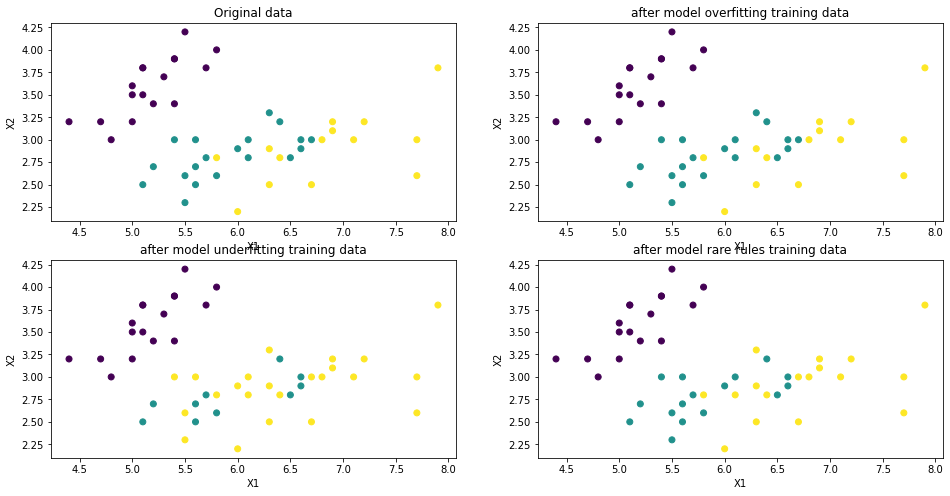

In [288]:
fig = plt.figure()
plt.figure(figsize=(16, 8))


plt.subplot(2, 2, 1)

plt.scatter(test['0'], test['1'],c=org_class.astype(int).to_numpy() )
plt.title('Original data')
plt.xlabel('X1')
plt.ylabel('X2')


plt.subplot(2, 2, 2)

plt.scatter(test['0'], test['1'], c=classes_x_overfitting)
plt.title('after model overfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 3)

plt.scatter(test['0'], test['1'], c=classes_x_underfitting)
plt.title('after model underfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 4)

plt.scatter(test['0'], test['1'], c=t_array)
plt.title('after model rare rules training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.savefig("Iris_data_plot.png")